In [8]:
from Config import *
from Dataset import *
from Experiments import *
from Metric import *
from Model import *
from Utils import *
from FID import *
from Train import *


In [9]:
class set_args:
    def __init__(self):
        self.seed = 5
        self.state = 'train'
        self.epochs = 30 # training epochs
        self.batch_size = 80
        self.dataset = 'MNIST'#'MNIST'#'CIFAR10' 
        self.split_class= [1]

        #Load different model if TRUE
        self.load_different_model = False
        self.load_training_checkpoint = 30 #30,#200
        self.load_rd_training_checkpoint = 29

        self.sample_dir = 'Result'
        self.checkpoint_dir = 'Result'
        self.M = [1]
        self.I = [0]

        #Reduce training sample
        self.rd = 0.05

        self.save_weight_dir = 'Result/CheckpointsMNIST/'
        
        
#directory_init()

args = set_args()
seed_everything(args.seed) 

"""Merge both these"""
model_config = set_config(args, custom_dataset=args.dataset) 

model, sampler, trainer = model_init(args, model_config)

"""Handle these afterward"""
#h_info_sampledImgs = sampler.load_h_information()
#xt_info_sampledImgs = sampler.load_xt_information()


"""Modifiying"""
#expriment1 = Experiment_1(args, model_config, model, sampler, trainer)
#expriment1.plot_sim()

Config : MNIST
Config : haha
loading model : 1_ckpt_30_.pt ......
model load weight done.
update Sampler ...... done
update Trainer ...... done


'Modifiying'

Timestep 999 add to h space information and xt information.
Timestep 998 add to h space information and xt information.
Timestep 997 add to h space information and xt information.
Timestep 996 add to h space information and xt information.
Timestep 995 add to h space information and xt information.
Timestep 994 add to h space information and xt information.
Timestep 993 add to h space information and xt information.
Timestep 992 add to h space information and xt information.
Timestep 991 add to h space information and xt information.
Timestep 990 add to h space information and xt information.
Timestep 989 add to h space information and xt information.
Timestep 988 add to h space information and xt information.
Timestep 987 add to h space information and xt information.
Timestep 986 add to h space information and xt information.
Timestep 985 add to h space information and xt information.
Timestep 984 add to h space information and xt information.
Timestep 983 add to h space information 

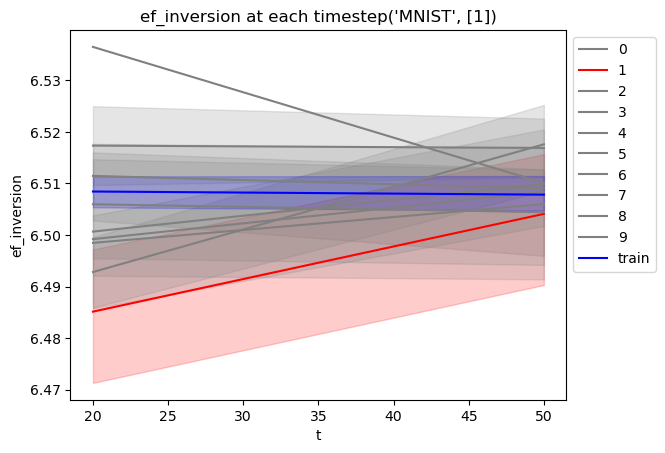

In [3]:
expriment1 = Experiment_1(args, model_config, model, sampler, trainer)
expriment1.plot_sim()

In [11]:
df_anchor = expriment1.df_anchor

"""pass"""
#df_anchor_is_train = df_anchor[df_anchor['is_train']==True]
#df_anchor_not_train = df_anchor[df_anchor['is_train']==False]

NameError: name 'expriment1' is not defined

# FID


In [4]:
block_idx = InceptionV3.BLOCK_INDEX_BY_DIM[2048]
InceptionV3_model = InceptionV3([block_idx])
InceptionV3_model=InceptionV3_model.cuda()

c:\Users\mw_st\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\mw_st\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
#real = sampledImgs
#fake = dt
#fretchet_dist=calculate_fretchet(real,fake,InceptionV3_model) 

In [7]:
#fretchet_dist

In [8]:
#grid = make_grid(fake, nrow=8).permute(1, 2, 0).cpu().numpy()

#plt.figure(figsize=(10, 10))
#plt.imshow(grid)
#plt.axis('off')
#plt.show()

# Calculate weight for eliminated from training 


In [9]:
"""pass"""
#df_anchor_is_train_mean = df_anchor_is_train.groupby(['idx'])[['scaled_ef_inversion','scaled_h']].mean().reset_index()
#df_anchor_is_train_mean['weight'] = (df_anchor_is_train_mean['scaled_ef_inversion'] + df_anchor_is_train_mean['scaled_h']) / 2
#df_anchor_is_train_mean

'pass'

In [10]:
#df_anchor_is_train_mean = df_anchor_is_train_mean.sort_values(by='weight')

In [11]:
#reduced_sort_idx = np.array(df_anchor_is_train_mean['idx'])

In [10]:
reduced_sort_idx = create_reduce_idx(args, df_anchor)

NameError: name 'df_anchor' is not defined

# Reduced Data

In [13]:
#reduced_percentile = 0.1

#dt_train = CUSTOM_DATASET(args, split=True)
#train_dataset, _ = dt_train.load_dataset(custom_trasform=True)
#HIHE_reduced_data = Subset(train_dataset, list(reduced_sort_idx[int(len(reduced_sort_idx)*reduced_percentile):]))

In [14]:
#HIHE_reduced_data = create_reduced_data(args, reduced_sort_idx, model_config)

# Training

In [7]:
train_new(args, reduced_sort_idx, model_config)

NameError: name 'reduced_sort_idx' is not defined

In [16]:
#evaluate(args, model_config)

In [17]:
"""
#def load_rd_model(args, modelConfig):
modelConfig = model_config
args.load_different_model = True
with torch.no_grad():
    device = torch.device(model_config["device"])
    model = UNet(T=modelConfig["T"], ch=modelConfig["channel"], ch_mult=modelConfig["channel_mult"], attn=modelConfig["attn"],
                    num_res_blocks=modelConfig["num_res_blocks"], dropout=0.)


    ckpt = torch.load(os.path.join(
        modelConfig["test_load_weight"]), map_location=device)
    model.load_state_dict(ckpt)
    print("model load weight done.")
    model.eval()
    sampler = GaussianDiffusionSampler(
        model, modelConfig["beta_1"], modelConfig["beta_T"], modelConfig["T"]).to(device)

#return model
"""
"""
def generate_sameple_img(args, model_config):
    with torch.no_grad():
        model.eval()
        noisyImage = torch.randn(
        size=[model_config["batch_size"], 3, 32, 32], device="cuda")
        saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)
        sampledImgs = sampler(noisyImage)

    return sampledImgs
"""

'\ndef generate_sameple_img(args, model_config):\n    with torch.no_grad():\n        model.eval()\n        noisyImage = torch.randn(\n        size=[model_config["batch_size"], 3, 32, 32], device="cuda")\n        saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)\n        sampledImgs = sampler(noisyImage)\n\n    return sampledImgs\n'

In [5]:
rd_model, rd_sampler, rd_trainer = model_init(args, model_config, rd=True)
fake = generate_sameple_img(args, model_config, rd_model, rd_sampler)


"""
with torch.no_grad():
    model.eval()
    noisyImage = torch.randn(
    size=[model_config["batch_size"], 3, 32, 32], device="cuda")
    saveNoisy = torch.clamp(noisyImage * 0.5 + 0.5, 0, 1)
    sampledImgs = rd_sampler(noisyImage)
"""
#fake = sampledImgs

fid_dt_train = CUSTOM_DATASET(args, split=True)
fid_train_dataset, _ = fid_dt_train.load_dataset(custom_trasform=True)

dt_loader = DataLoader(fid_train_dataset, batch_size=fake.shape[0], shuffle=False)

for dt, i in dt_loader:
    print(dt.shape)
    break

real = dt
fretchet_dist = calculate_fretchet(real,fake,InceptionV3_model) 

Config : haha
loading model : rd5_c1_ckpt_29_.pt ......
model load weight done.
update Sampler ...... done
update Trainer ...... done
Timestep 999 add to h space information and xt information.
Timestep 998 add to h space information and xt information.
Timestep 997 add to h space information and xt information.
Timestep 996 add to h space information and xt information.
Timestep 995 add to h space information and xt information.
Timestep 994 add to h space information and xt information.
Timestep 993 add to h space information and xt information.
Timestep 992 add to h space information and xt information.
Timestep 991 add to h space information and xt information.
Timestep 990 add to h space information and xt information.
Timestep 989 add to h space information and xt information.
Timestep 988 add to h space information and xt information.
Timestep 987 add to h space information and xt information.
Timestep 986 add to h space information and xt information.
Timestep 985 add to h spac

In [6]:
fretchet_dist

420.9405493444843

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


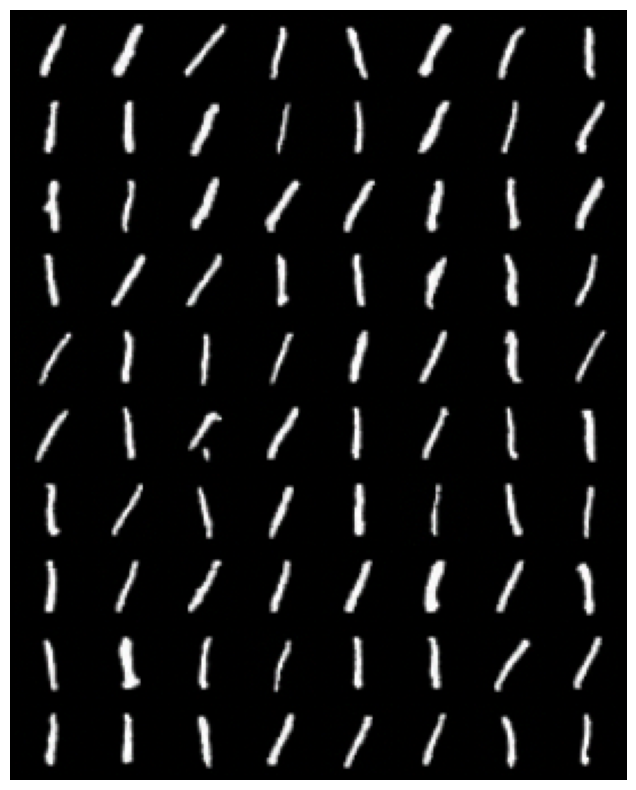

In [ ]:
grid = make_grid(fake, nrow=8).permute(1, 2, 0).cpu().numpy()

plt.figure(figsize=(10, 10))
plt.imshow(grid)
plt.axis('off')
plt.show()